<a href="https://colab.research.google.com/github/MLValadares/98345-course-uge/blob/main/01_Exploration_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reset

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import plotly.express as px
import os
from google.colab import drive

%matplotlib inline

# Exploration

The purpose of this notebook is to get familiar with the relevant data sets that are used during the course. You will see examples of how to work with numpy, pandas and plotting libraries.

## Detailed population data

INSEE provides detailed population information per municipality as open data:

- Go to https://www.insee.fr/fr/statistiques/6544333
- Download "Individus localisés au canton-ou-ville - Zone A" in CSV format
- Note that "Zone A" includes only the Île-de-France region. There is data for all France or other regions and departments in other zones.
- Put the downloaded zip file into the `data` folder next to this notebook
- Unpack the zip file so that the CSV file is located inside the `data` folder
- Alternatively call the following cell if you are using Linux

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# drive.mount('/content/drive',force_remount=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(os.getcwd())

/content


In [ ]:
# if not os.path.exists("FD_INDCVIZA_2019.csv"):
#     # !cd data && wget https://www.insee.fr/fr/statistiques/fichier/6544333/RP2019_INDCVIZA_csv.zip
#     # !cd data && unzip RP2019_INDCVIZA_csv.zip
#     # !cd data && rm RP2019_INDCVIZA_csv.zip
#     !wget https://www.insee.fr/fr/statistiques/fichier/6544333/RP2019_INDCVIZA_csv.zip
#     !unzip RP2019_INDCVIZA_csv.zip
#     !rm RP2019_INDCVIZA_csv.zip

Next, load a chunk of the data to see what is contained in the file:

In [ ]:
# df_census = pd.read_csv("data/FD_INDCVIZA_2019.csv", sep = ";", nrows = 10)
df_census = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/course-uge/data/FD_INDCVIZA_2019.csv", sep = ";", nrows = 10)
df_census.head()

,CANTVILLE,NUMMI,ACHLR,AEMMR,AGED,AGER20,AGEREV,AGEREVQ,ANAI,ANEMR,...,TP,TRANS,TRIRIS,TYPC,TYPFC,TYPL,TYPMC,TYPMR,VOIT,WC
0,75ZZ,1,1,9,72,79,72,70,1944,2,...,Z,Z,751501,3,Z,1,1,12,1,Z
1,75ZZ,2,2,9,59,64,58,55,1958,3,...,1,5,750901,3,2,6,4,41,0,Z
2,75ZZ,2,2,9,30,29,29,25,1987,3,...,1,6,750901,3,2,6,4,41,0,Z
3,75ZZ,3,1,7,82,80,81,80,1938,5,...,Z,Z,751431,3,2,2,4,44,1,Z
4,75ZZ,3,1,7,86,80,85,85,1934,5,...,Z,Z,751431,3,2,2,4,44,1,Z


You will find information on the variables in the dataset by clicking on "Dictionnaire des variables" in the link above and downloading the corresponding PDF.

**Task**:  For our first analysis, load the following columns. For performance reasons, it makes sense, to define a data type for each column:
- Detailed age (by year) as `int`
- Socioprofessional category (Catégorie socioprofessionnelle en 8 postes) as `int`

Additionally, load the following columns:
- `IRIS` is an identifier for the location of the observation in France, load it as `str`
- `IPONDI` is a weight of each observation, load it as `float`

In [ ]:
columns = {
    "IRIS": str,
    "IPONDI": float,

    "AGED": int,
    "CS1": int

}

df_census = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/course-uge/data/FD_INDCVIZA_2019.csv", sep = ";", dtype = columns, usecols = columns.keys())
df_census.head()

,AGED,CS1,IPONDI,IRIS
0,72,7,3.360730,751155817
1,59,3,3.668459,751124512
2,30,3,3.668459,751124512
3,82,7,3.478821,751155907
4,86,7,3.478821,751155907


**Task**:  It is always better to work with a cleaned data set, let's clean up the column names:
- The age column to `age`
- The socioprofessional category column to `csp`

In [ ]:
df_census = df_census.rename(columns = {
    "IRIS": "iris_id",
    "IPONDI": "weight",

    "AGED": "age",
    "CS1": "csp"
})

df_census.head()

,age,csp,weight,iris_id
0,72,7,3.360730,751155817
1,59,3,3.668459,751124512
2,30,3,3.668459,751124512
3,82,7,3.478821,751155907
4,86,7,3.478821,751155907


The data set contains the official open census data from the French statistical office INSEE. Let's aggregate the data to obtain a data frame that gives us the number of observations at a certain age:

In [ ]:
df_age = df_census.groupby("age").size().reset_index(name = "count")
df_age.head()

,age,count
0,0,2722
1,1,61520
2,2,60735
3,3,61166
4,4,60681


And plot this information using plotly:

In [ ]:
px.bar(df_age, x = "age", y = "count")

Is this information correct? Write the code to calculate total number of observations in the data set:

In [ ]:
# Insert your code here
len(df_census)

4354518

Compare this value with information from other sources like Wikipedia? Do we see a difference? Why?

**Task**: Write the code to calculate the correct number of Île-de-France inhabitants:

In [ ]:
# Insert your code here
df_census["weight"].sum()

12262391.339796167

**Task:** Show a bar plot of both the count of *observations* at a specific age and the number of *persons*.

Hints:
- You will need another aggregator function than `size` (used before) in your `groupby` statement
- You will need to `merge` the existing `df_age` data frame and a new one that you create
- For the y-axis, you may pass a list of columns to plotly
- Try to use the `barmode = "group"` argument for plotly

In [ ]:
# Insert your code here
df_age_weighted = df_census.groupby("age")["weight"].sum().reset_index(name = "weighted")
df_comparison = pd.merge(df_age, df_age_weighted, on = "age")
px.bar(df_comparison, x = "age", y = ["count", "weighted"], barmode = "group")

**Task:** On average, how many persons are represented by one observation in the census data?

In [ ]:
# Insert your code here
df_csp = df_census.groupby(["age", "csp"])["weight"].sum().reset_index()
df_total = df_census.groupby("age")["weight"].sum().reset_index().rename(columns = { "weight": "total" })

df_csp = pd.merge(df_csp, df_total, on = "age")
df_csp["share"] = df_csp["weight"] / df_csp["total"]
df_csp["csp"] = df_csp["csp"].astype(str)

px.bar(df_csp, x = "age", y = "share", color = "csp")

Let's explore the data a bit further.

**Task:** Show the number of persons for each socioprofessional category in a plot.

Bonus: Instead of showing only CSP identifiers, can you show the name of the CSPs?

Remember, the socioprofessional category is a classification of persons in France according to their job status:
https://www.insee.fr/fr/metadonnees/pcs2003/categorieSocioprofessionnelleAgregee/1?champRecherche=true

In [ ]:
# Insert your code here
df_census["weight"].mean()

2.8160157656475797

**Task:** Show a line plot with one age distribution per CSP in different colors and use it to compare the age distribution of at least three CSP. Aggregate the years by 10.

Hint:
- You will need to aggregate over two columns this time.

In [ ]:
# Insert your code here
df_csp = df_census.groupby("csp")["weight"].sum().reset_index()

df_csp["csp"] = df_csp["csp"].replace({
    1: "Agriculteurs",
    2: "Artisans",
    3: "Cadres",
    4: "Intermédiaires",
    5: "Employés",
    6: "Ouvriers",
    7: "Retraités",
    8: "Autres"
})

px.bar(df_csp, x = "csp", y = "weight")

The previous analysis were performed in absolute terms. Let's pass on to a relative analysis. We want to know which share of people belongs to a certain CSP for each age. The ages are represented by bars with the CSPs stacked on top of each other. Each bar has a height of `1.0` or 100%.

**Task:** Set up a stacked bar plot where all CSPs are shown per age.

Hints:
- Proceed as in the previous task, but perform a second aggregation by age.
- Via `merge`, append another column to the two-variable data set that describes this total
- Then, divide the absolute value by the group total

In [ ]:
# Insert your code here
df_csp = df_census.groupby(["age", "csp"])["weight"].sum().reset_index()
df_total = df_census.groupby("age")["weight"].sum().reset_index().rename(columns = { "weight": "total" })

df_csp = pd.merge(df_csp, df_total, on = "age")
df_csp["share"] = df_csp["weight"] / df_csp["total"]
df_csp["csp"] = df_csp["csp"].astype(str)

px.bar(df_csp, x = "age", y = "share", color = "csp")

## Spatial data

So far, we have only performed analysis over the whole IDF population. The data set contains a column called `IRIS`. This is a statistical zoning system that covers France. Each zone in that system has a unique identifier. It is constructed as follows:

- `[2]` digits are the department identifier
- `[3]` following digits describe the municipality
- `[4]` following digits describe the IRIS (sub-municipality zoning)

For instance, the 14e arrondissement in Paris has the `75` as the department identifier `75`, followed by `114` indicating the arrondissement. After, there are four digits that describe smaller zones within the arrondissement, for instance:

`[75][114][0001]`

**Task:** For convience, let's create additional columns that indicate the department and the municipality of an observation:
- `department_id`: The first two digits of `iris_id`
- `municipality_id`: The five first digits of `iris_id`

Hint: IRIS are strings although they may appear as numbers. The reason is that the department codes for Corsica are 2A and 2B.

In [ ]:
# Insert your code here
df_census["department_id"] = df_census["iris_id"].str[:2]
df_census["municipality_id"] = df_census["iris_id"].str[:5]

**Task:** Find out which is the department with the highest number of inhabitants. Which is the least inhabitated one? Show an ordered list.

In [ ]:
# Insert your code here
df_census.groupby("department_id")["weight"].sum().sort_values(ascending = True).head(10).reset_index()

,department_id,weight
0,77,8.702748e+05
1,91,9.724825e+05
2,95,1.079016e+06
3,78,1.187361e+06
4,ZZ,1.339957e+06
5,94,1.384903e+06
6,92,1.622897e+06
7,93,1.639868e+06
8,75,2.165631e+06


**Task:** Let's repeat the exercise by identifying the top 10 and bottom 10 municipalities:

In [ ]:
# Insert your code here
df_census.groupby("municipality_id")["weight"].sum().sort_values(ascending = True).head(10).reset_index()

,municipality_id,weight
0,94048,4768.221117
1,78571,4950.000000
2,77431,5371.569444
3,77458,5399.565249
4,78133,5535.139487
5,94065,5619.582710
6,95480,5628.421514
7,78160,5655.916681
8,95371,5670.734971
9,78537,5855.000000


Which are the names of those municipalities? You can look them up on Wikipedia, for instance, by searching for their INSEE codes.

## Mapping

Looking at spatial data works best when using maps. The IRIS system is not only a system of identifiers, but there is also geographic shape data attached to it. The data is provided by IGN (Institut Géographique National).

- Download the data from https://geoservices.ign.fr/contoursiris
- Make sure to download the 2021 edition which is compatible with our 2019 census data
- Unpack the 7z file. The relevant files for us are located in `CONTOURS*/1_DONNES/*LAMB93*/` (make sure about the last `LAMB93` part).
- Copy the files prefixed with `CONTOURS-IRIS.*` to the `data` folder next to this notebook

Linux users may execute the next cell:


In [ ]:
# if not os.path.exists("data/CONTOURS-IRIS.shp"):
#     !cd data && wget https://data.geopf.fr/telechargement/download/CONTOURS-IRIS/CONTOURS-IRIS_2-1__SHP__FRA_2021-01-01/CONTOURS-IRIS_2-1__SHP__FRA_2021-01-01.7z
#     !cd data && 7z x CONTOURS-IRIS_2-1__SHP__FRA_2021-01-01.7z -y
#     !cd data && cp CONTOURS-IRIS_2-1__SHP__FRA_2021-01-01/CONTOURS-IRIS/1_DONNEES_LIVRAISON_2021-06-00217/CONTOURS-IRIS_2-1_SHP_LAMB93_FXX-2021/CONTOURS-IRIS.* .
#     !cd data && rm CONTOURS-IRIS_2-1__SHP__FRA_2021-01-01.7z

Let's load the data using `geopandas`:

In [ ]:
df_iris = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/course-uge/data/CONTOURS-IRIS.shp")
df_iris.head()

,INSEE_COM,NOM_COM,IRIS,CODE_IRIS,NOM_IRIS,TYP_IRIS,geometry
0,72191,Mayet,0000,721910000,Mayet,Z,"POLYGON ((498083.5 6747517.4, 498128 6747467.1..."
1,77248,Lesches,0000,772480000,Lesches,Z,"POLYGON ((685753.1 6868612.9, 685757.7 6868592..."
2,51426,Péas,0000,514260000,Péas,Z,"POLYGON ((759067.2 6849592.7, 758778.6 6849650..."
3,81199,Padiès,0000,811990000,Padiès,Z,"POLYGON ((651482.8 6326359.4, 651475.6 6326359..."
4,59225,Feignies,0102,592250102,Sud,H,"POLYGON ((767673.5 7022290.5, 767647.2 7022275..."


As before, let's clean up the data set. We will need the following columns with the following readable names:
- `INSEE_COM`: `municipality_id`
- `CODE_IRIS`: `iris_id`
- `geometry`

**Task:** Set up the data set accordingly.

In [ ]:
# Insert your code here
df_iris = df_iris.rename(columns = {
    "INSEE_COM": "municipality_id",
    "CODE_IRIS": "iris_id"
})[["iris_id", "municipality_id", "geometry"]]
df_iris.head()

,iris_id,municipality_id,geometry
0,721910000,72191,"POLYGON ((498083.5 6747517.4, 498128 6747467.1..."
1,772480000,77248,"POLYGON ((685753.1 6868612.9, 685757.7 6868592..."
2,514260000,51426,"POLYGON ((759067.2 6849592.7, 758778.6 6849650..."
3,811990000,81199,"POLYGON ((651482.8 6326359.4, 651475.6 6326359..."
4,592250102,59225,"POLYGON ((767673.5 7022290.5, 767647.2 7022275..."


**Task**: Calculate how many IRIS exist in France and how many municipalities are there:

In [ ]:
# Insert your code here
len(df_iris)

48589

In [ ]:
len(df_iris["municipality_id"].unique())

34878

You can try plotting all IRIS or all municipalities, but this will usually take a while with the standard Python tools. Let's plot only Paris:

<Axes: >

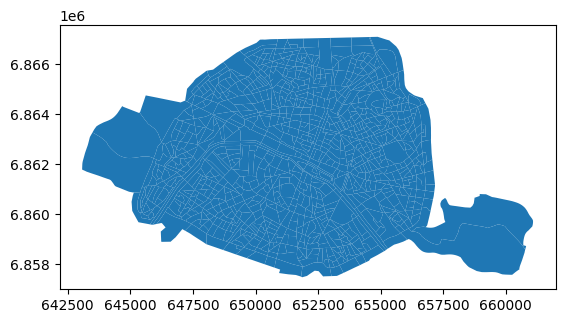

In [ ]:
df_iris[
    df_iris["municipality_id"].str.startswith("75")
].plot()

**Task**: Only the spatial shapes are not really useful. We should attach some data to it. To simplify our life, let's create a data frame based on `df_iris` that only contains the municipality shapes `df_municipalities`.

Hint: Check the `dissolve` method in `geopandas`.

In [ ]:
# Insert your code here
df_municipalities = df_iris.dissolve(by = "municipality_id").reset_index()
# df_municipalities[
#     df_municipalities["municipality_id"].str.startswith("75")
# ].plot()


**Task**: Plot all municipalities in the Essonne departmennt (91).

<Axes: >

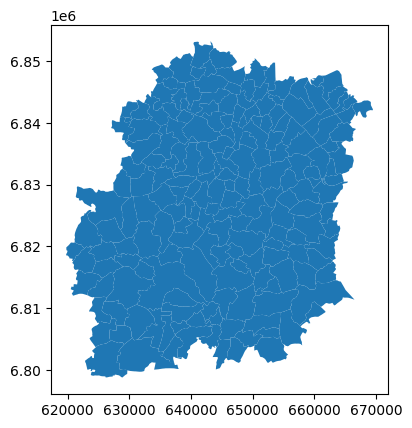

In [ ]:
# Insert your code here
df_municipalities[
    df_municipalities["municipality_id"].str.startswith("91")
].plot()

**Task**: Show all municipalities in the "petite couronne" including Paris.

<Axes: >

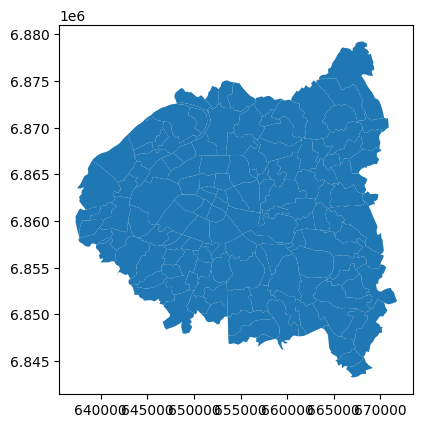

In [ ]:
# Insert your code here
filter_departments = ["75", "92", "93", "94",]
df_filter = df_municipalities[
    df_municipalities["municipality_id"].str.startswith(tuple(filter_departments))
]
df_filter.plot()


**Task**: Now we are ready to cross some information with the spatial data set:
- Equip your `df_census` data frame with a `municipality_id` column
- Prepare a data set that contains the number of inhabitants per municipality (`municipality_id`, `inhabitants`)
- Perform a merge between your municipality data frame and the inhabitant data frame
- Provide the inhabitants column in the `plot` method

<Axes: >

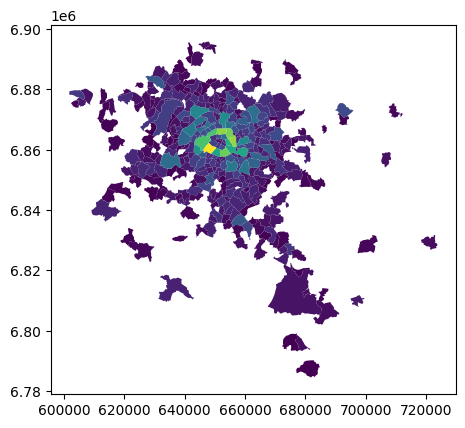

In [ ]:
# Insert your code here
df_inhabitants = df_census.groupby("municipality_id")["weight"].sum().reset_index()
pd.merge(df_municipalities, df_inhabitants, on = "municipality_id").plot("weight")

Do you observe anything specific?

**Task**: Plot a population map of "petite couronne"" with a legend (using `legend = True`)

<Axes: >

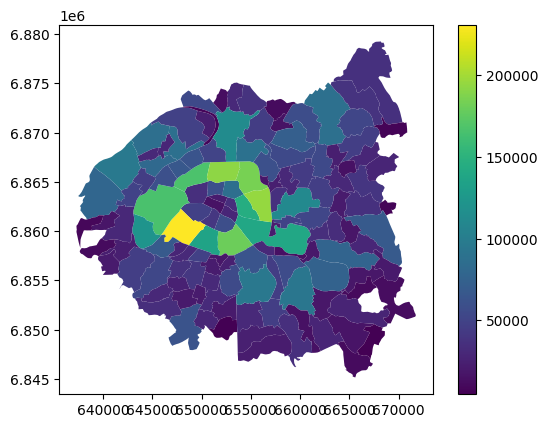

In [ ]:
# Insert your code here
df_inhabitants = df_census.groupby("municipality_id")["weight"].sum().reset_index()
pd.merge(df_filter, df_inhabitants, on = "municipality_id").plot("weight", legend = True)


## Aggregated population data

To solve the issue, INSEE provides aggregated census data sets with less attributes but higher spatial availability. We will make use of a data set that indicates the total population and population per CSP over 15 years for every municipality in France:

- The data is available at https://www.insee.fr/fr/statistiques/6543200
- Download "Population en 2019 - IRIS - France hors Mayotte" in CSV format
- Information on the variables is avaialble in "Dictionnaire des variables"

Linux users may execute the following cell:

In [ ]:
# if not os.path.exists("data/base-ic-evol-struct-pop-2019.CSV"):
#     !cd data && wget https://www.insee.fr/fr/statistiques/fichier/6543200/base-ic-evol-struct-pop-2019_csv.zip
#     !cd data && unzip base-ic-evol-struct-pop-2019_csv.zip
#     !cd data && rm base-ic-evol-struct-pop-2019_csv.zip

**Task**: Load the data set have a first look
- Only load a couple of lines (`nrows=20`) to be sure that you don't exceed your memory
- Look at the first few lines and check the explanation of the variables online
- How can you obtain the population total per municipality from this data set?
- How can you obtain the number of persons per CSP from this data set?

In [ ]:
df_population = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/course-uge/data/base-ic-evol-struct-pop-2019.CSV", sep = ";", nrows = 20)
df_population.head()

,IRIS,COM,TYP_IRIS,MODIF_IRIS,LAB_IRIS,P19_POP,P19_POP0002,P19_POP0305,P19_POP0610,P19_POP1117,...,C19_F15P_CS4,C19_F15P_CS5,C19_F15P_CS6,C19_F15P_CS7,C19_F15P_CS8,P19_POP_FR,P19_POP_ETR,P19_POP_IMM,P19_PMEN,P19_PHORMEN
0,10010000,1001,Z,0,5,779.000000,28.717996,17.704186,56.118237,88.707423,...,51.660136,85.506573,30.706106,74.014043,15.282114,770.764925,8.235075,20.489890,779.000000,0.000000
1,10020000,1002,Z,0,5,256.000000,14.822643,10.649265,14.954810,25.657176,...,21.129095,26.532030,0.000000,20.804745,0.000000,253.880636,2.119364,3.159602,256.000000,0.000000
2,10040101,1004,H,0,1,1866.820612,81.762602,47.104967,100.705691,139.733038,...,97.002069,230.709482,57.381411,173.435664,188.940291,1581.546546,285.274066,254.016701,1503.829647,362.990965
3,10040102,1004,H,0,1,3597.838556,168.897927,119.186603,198.365404,259.072890,...,227.534831,393.985009,153.027649,395.418257,324.027792,3147.417422,450.421134,561.857429,3597.838556,0.000000
4,10040201,1004,H,0,1,4134.477890,167.871616,174.765320,272.922347,394.708508,...,251.065974,374.705891,192.484961,512.421938,366.036586,3774.171377,360.306514,418.569299,4046.480081,87.997810


**Task**: Transform the data set such that you have each municipality together with the population total and the total of each CSP:

In [ ]:
pd.DataFrame({ "municipality_id": [], "population": [], "csp_1": [], "csp_2": [], "csp_3": [], "csp_...": [] })

,municipality_id,population,csp_1,csp_2,csp_3,csp_...


Hint: The data set is given per IRIS.

In [ ]:
# Insert your code here
# df_population = ...

# columns = ["COM", "C19_POP15P_CS"]
columns = ["COM", "C19_POP15P"]
columns += ["C19_POP15P_CS{}".format(k) for k in range(1, 9)]

df_population = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/course-uge/data/base-ic-evol-struct-pop-2019.CSV", sep = ";", usecols = columns, dtype = {
     "COM": str
})

renamed_columns = ["municipality_id", "population"]
renamed_columns += ["csp_{}".format(k) for k in range(1, 9)]

df_population.columns = renamed_columns

df_population = df_population.groupby("municipality_id").sum().reset_index()
df_population

,municipality_id,population,csp_1,csp_2,csp_3,csp_4,csp_5,csp_6,csp_7,csp_8
0,01001,619.406049,15.565978,19.822632,76.142088,98.357964,100.516361,126.843164,152.541469,29.616393
1,01002,205.408895,0.000000,21.265503,15.927908,26.460181,42.135589,10.596822,67.296631,21.726261
2,01004,11508.832532,2.762881,327.166403,784.225660,1890.243930,1891.133347,2001.750487,2763.422684,1848.127141
3,01005,1390.384400,4.913019,112.999439,112.999439,221.085859,294.781145,186.694725,338.998316,117.912458
4,01006,91.636364,0.000000,0.000000,5.090909,25.454545,15.272727,15.272727,25.454545,5.090909
...,...,...,...,...,...,...,...,...,...,...
34985,97420,18357.493396,132.645899,600.979456,760.699348,2486.081710,3999.997623,2624.710721,2440.443091,5311.935549
34986,97421,5395.000000,205.000000,145.000000,60.000000,345.000000,920.000000,1135.000000,660.000000,1925.000000
34987,97422,61865.447815,1105.911121,2429.827432,2229.743854,7022.017452,12993.475117,8175.812588,10539.247496,17369.412753
34988,97423,5578.591701,60.509132,156.315256,196.654677,579.879177,1356.413032,1025.279554,675.685302,1527.855571


**Task**: Repeat the task from above, create a map of the population in Île-de-France, but with the new data set. Note: The two data sets (geography and population totals) are now given for all France, so you can also plot the whole country.

<Axes: >

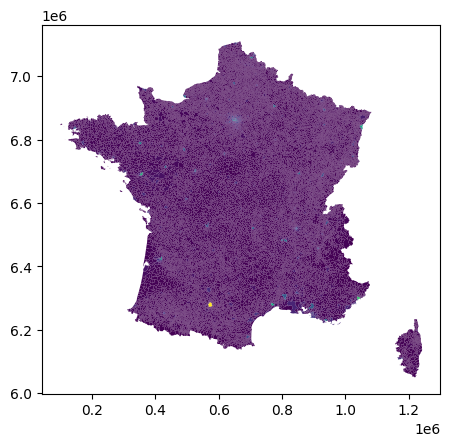

In [ ]:
# Insert your code here
pd.merge(df_municipalities, df_population, on = "municipality_id").plot("population")

# pd.merge(df_municipalities[
#     df_municipalities["municipality_id"].str[:2].isin([
#         "75", "92", "93", "94", "95", "77", "91", "78"
#     ])
# ], df_population, on = "municipality_id").plot("population")

<Axes: >

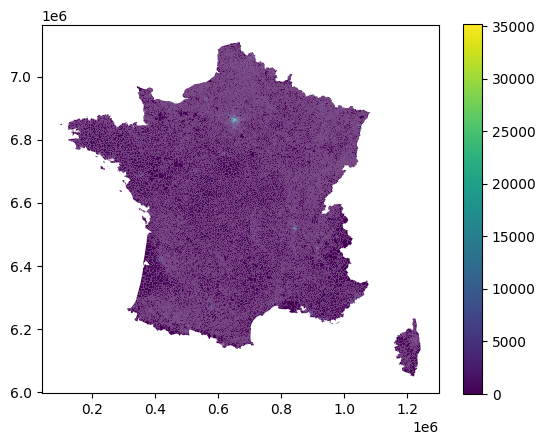

In [ ]:
df_plot = pd.merge(df_municipalities, df_population, on = "municipality_id")
df_plot["density"] = df_plot["population"] / df_plot["geometry"].area * 1000000
df_plot.plot("density", legend = True)

Save the cleaned population data, because we will need it again in a later exercise:

In [ ]:
df_population.to_parquet("/content/drive/MyDrive/Colab Notebooks/course-uge/data/population.parquet")

Let's do the same with the municipalities spatial data set:

In [ ]:
df_municipalities.to_parquet("/content/drive/MyDrive/Colab Notebooks/course-uge/data/municipalities.parquet")

For mapping, Python can be useful to make a first draft, but there are more elaborate tools available.

**Task**: Create a data frame in which the municipality data has been merged with the the population data set, i.e., we want all columns from the population data set and additionally the `geometry` column. Filter for all municipalities in Île-de-France. Save this data frame in GeoPackage format:

In [ ]:
# Insert your code here
df_export = gpd.GeoDataFrame(pd.merge(df_population, df_municipalities, on = "municipality_id"))


In [ ]:
# df_export.to_file("/content/drive/MyDrive/Colab Notebooks/course-uge/data/export.gpkg")

**Exercise**: Explore the exported data using **QGIS**

![](material/qgis.png)

## Employment

In a later exercise, we will also need information on employment. Employment data per municipality is avaialble as open data from Urssaf.

- Download the data from https://open.urssaf.fr/explore/dataset/etablissements-et-effectifs-salaries-au-niveau-commune-x-ape-last/information/
- Go to "Export" and export the data as CSV

Linux users may execute the following cell:

In [ ]:
# if not os.path.exists("etablissements-et-effectifs-salaries-au-niveau-commune-x-ape-last.csv"):
#     !wget "https://open.urssaf.fr/api/explore/v2.1/catalog/datasets/etablissements-et-effectifs-salaries-au-niveau-commune-x-ape-last/exports/csv?lang=fr&timezone=Europe%2FBerlin&use_labels=true&delimiter=%3B" -O etablissements-et-effectifs-salaries-au-niveau-commune-x-ape-last.csv

**Task**: As before, explore the data by first loading a few columns and understanding the content.

Hint: To get a better overview of the available columns, try `df.columns`

In [ ]:
# Insert your code here
df_employment = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/course-uge/data/etablissements-et-effectifs-salaries-au-niveau-commune-x-ape-last.csv", sep = ";")
df_employment.head()

<ipython-input-43-804e70ad2cf4>:2: DtypeWarning:

Columns (14,16,17) have mixed types. Specify dtype option on import or set low_memory=False.



,Région,Ancienne région,Département,Zone d'emploi,EPCI,Nom commune,Commune,Grand secteur d'activité,Secteur NA17,Secteur NA38,...,Nombre d'établissements 2019,Effectifs salariés 2019,Nombre d'établissements 2020,Effectifs salariés 2020,Nombre d'établissements 2021,Effectifs salariés 2021,Nombre d'établissements 2022,Effectifs salariés 2022,Nombre d'établissements 2023,Effectifs salariés 2023
0,Île-de-France,Île-de-France,Hauts-de-Seine,Paris,Métropole du Grand Paris,Meudon,92048 Meudon,GS5 Autres services marchands hors intérim,MN Activités scientifiques et techniques ; sou...,NZ Activités de services administratifs et de ...,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,NaN,NaN
1,Île-de-France,Île-de-France,Hauts-de-Seine,Paris,Métropole du Grand Paris,Meudon,92048 Meudon,GS5 Autres services marchands hors intérim,MN Activités scientifiques et techniques ; sou...,NZ Activités de services administratifs et de ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Île-de-France,Île-de-France,Hauts-de-Seine,Paris,Métropole du Grand Paris,Meudon,92048 Meudon,GS7 Services non marchands,"OQ Administrations publiques, défense, enseign...",PZ Education,...,2.0,65.0,2.0,103.0,2.0,62.0,2.0,59.0,2.0,56.0
3,Île-de-France,Île-de-France,Hauts-de-Seine,Paris,Métropole du Grand Paris,Meudon,92048 Meudon,GS7 Services non marchands,"OQ Administrations publiques, défense, enseign...",PZ Education,...,4.0,6.0,4.0,4.0,5.0,8.0,5.0,6.0,4.0,6.0
4,Île-de-France,Île-de-France,Hauts-de-Seine,Paris,Métropole du Grand Paris,Meudon,92048 Meudon,GS7 Services non marchands,"OQ Administrations publiques, défense, enseign...",PZ Education,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Task**: Clean the data set such that you have a column indicating the municipality identifier and the number of emloyees in 2019 in that zone.

Hint: The data frame is disaggregated over various economic sectors (NAF code), but we want the total! Also, make sure to read the municipality codes as a string.

In [ ]:
pd.DataFrame({ "municipality_id": [], "employment": [] })

,municipality_id,employment


In [ ]:
# Insert your code here
columns = ["Code commune", "Effectifs salariés 2019"]
df_employment = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/course-uge/data/etablissements-et-effectifs-salaries-au-niveau-commune-x-ape-last.csv", sep = ";",
                            usecols = columns , dtype = { "Code commune": str })

df_employment = df_employment.rename(columns = {
    "Code commune": "municipality_id",
    "Effectifs salariés 2019": "employment"
})
# TREAT NAN VALUES
df_employment = df_employment.groupby("municipality_id").sum().reset_index()

df_employment.head()

,municipality_id,employment
0,01001,29.0
1,01002,2.0
2,01004,4851.0
3,01005,117.0
4,01007,305.0


**Task**: Plot a map of the number of employees in a department of your choice

<Axes: >

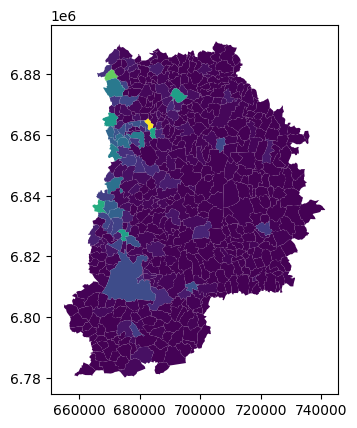

In [ ]:
# Insert your code here

df = pd.merge(df_municipalities[df_municipalities["municipality_id"].str.startswith("77")], df_employment)
df.plot("employment")


**Task**: Plot a map of the employment *density* of employees in a department of your choice.

<Axes: >

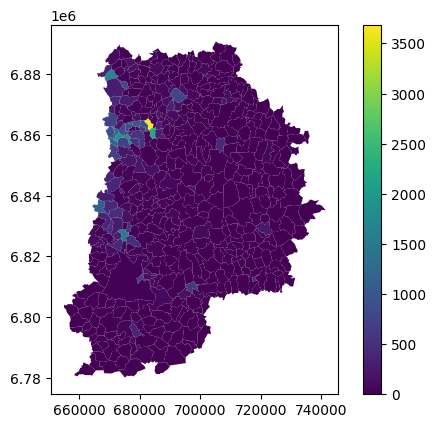

In [ ]:
# Insert your code here
df_density = df
df_density["density"] = df_density["employment"] / df_density["geometry"].area * 1000000
df_density.plot("density", legend = True)

Let's save this data for later:

In [ ]:
df_employment.to_parquet("/content/drive/MyDrive/Colab Notebooks/course-uge/data/employment.parquet")

## Commuting data

Finally, we will have a look at a more complex data set: commuting data. This data set is also available from INSEE and describes how many people living in a specific municipality in France to to any other municipality for work. This data set is known as *MOBPRO*.

- Download the data from https://www.insee.fr/fr/statistiques/6456056
- Download the data in CSV format

Linux users may execute the following cell:

In [ ]:
# if not os.path.exists("data/FD_MOBPRO_2019.csv"):
#     !cd data && wget https://www.insee.fr/fr/statistiques/fichier/6456056/RP2019_mobpro_csv.zip
#     !cd data && unzip RP2019_mobpro_csv.zip
#     !cd data && rm RP2019_mobpro_csv.zip

/bin/bash: line 1: cd: data: No such file or directory
/bin/bash: line 1: cd: data: No such file or directory
/bin/bash: line 1: cd: data: No such file or directory


**Task**: Load the data set with the following columns:
- `COMMUNE` : `str`
- `ARM` : `str`
- `DCLT`: `str`
- `IPONDI`: `float`
- `TRANS`: `int`

In [ ]:
# Insert your code here
df_commutes = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/course-uge/data/FD_MOBPRO_2019.csv", sep = ";", dtype = {
    "COMMUNE": str,
    "ARM": str,
    "DCLT": str,
    "IPONDI": float,
    "TRANS": int
}, usecols = ["COMMUNE", "ARM", "DCLT", "IPONDI", "TRANS"])
df_commutes.head()

,COMMUNE,ARM,DCLT,IPONDI,TRANS
0,01001,ZZZZZ,01001,5.380466,5
1,01001,ZZZZZ,01001,5.234635,5
2,01001,ZZZZZ,01001,5.234635,5
3,01001,ZZZZZ,01001,5.092756,1
4,01001,ZZZZZ,01001,5.092756,1


The MOBPRO data set is a bit particular with respect to the spatial identifiers. In fact, `DCLT` describes the destination of a commuters as a municipality identifier. In principle, this is also the case for `COMMUNE` which describes the origin. However, Paris, for instance, is encoded as `75056`, but the actual "municipality" (or arrondissement) is contained in `ARM`. If one knows this, there is an easy fix:

In [ ]:
f = df_commutes["ARM"] != "ZZZZZ"
df_commutes.loc[f, "COMMUNE"] = df_commutes.loc[f, "ARM"]

**Task**: Reformat the data frame so that we have the following format.

In [ ]:
pd.DataFrame({ "origin_id": [], "destination_id": [], "weight": [], "transport_mode": [] })

,origin_id,destination_id,weight,transport_mode


In [ ]:
# Insert your code here
df_commutes.drop(columns = "ARM")
df_commutes = df_commutes.rename(columns = {
    "COMMUNE": "origin_id",
    "DCLT": "destination_id",
    "IPONDI": "weight",
    "TRANS": "transport_mode"
})
df_commutes.head()

,origin_id,ARM,destination_id,weight,transport_mode
0,01001,ZZZZZ,01001,5.380466,5
1,01001,ZZZZZ,01001,5.234635,5
2,01001,ZZZZZ,01001,5.234635,5
3,01001,ZZZZZ,01001,5.092756,1
4,01001,ZZZZZ,01001,5.092756,1


**Task**: Plot a map showing how many people commute from Melun (77288) in the south of Paris to any other municipality in Île-de-France **by car**.

<Axes: >

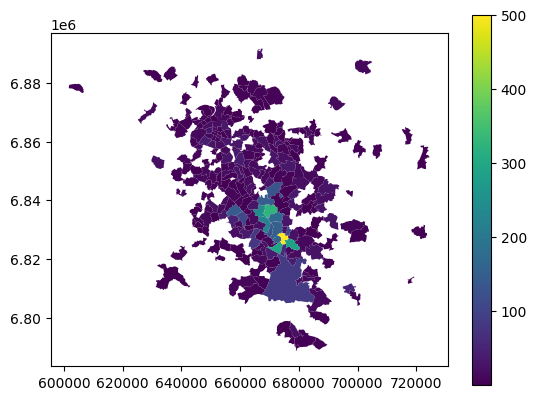

In [ ]:
# Insert your code here
df_filter = df_commutes[
    (df_commutes["origin_id"] == "77288") &
    # (df_commutes["destination_id"].str.startswith("77")) &
    (df_commutes["transport_mode"] == 5)].groupby("destination_id").sum().reset_index()
df_filter = df_filter[df_filter["destination_id"].str[:2].isin([ "75", "92", "93", "94", "95", "77", "91", "78"])]
# pd.merge(df_filter, df_municipalities, left_on = "destination_id", right_on = "municipality_id").head()
pd.merge(df_municipalities,df_filter, left_on = "municipality_id", right_on = "destination_id").plot("weight", legend = True, vmax = 500)
# df_filter.plot()

**Task**: Plot the same map but for commutes by **public transport**. What do you notice?

<Axes: >

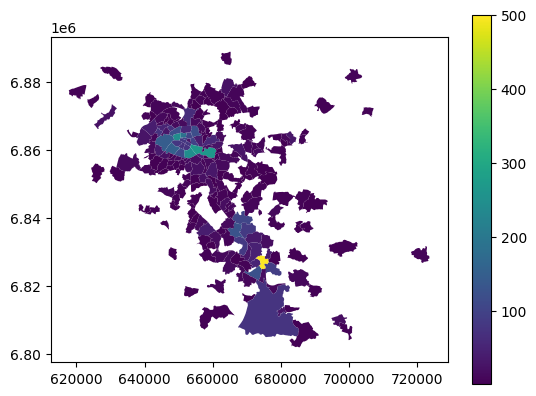

In [ ]:
# Insert your code here
df_filter = df_commutes[
    (df_commutes["origin_id"] == "77288") &
    (df_commutes["transport_mode"] == 6)].groupby("destination_id").sum().reset_index()
df_filter = df_filter[df_filter["destination_id"].str[:2].isin([ "75", "92", "93", "94", "95", "77", "91", "78"])]
pd.merge(df_municipalities,df_filter, left_on = "municipality_id", right_on = "destination_id").plot("weight", legend = True, vmax = 500)

**Task:** Aggregate the commuting data set further by removing the `transport_mode` column such that we only have the bare commuting flows as a weight between two municipalities. Then, save the data set as `commutes.parquet`, we will need it later on!

In [ ]:
# Insert your code
df_commutes.groupby(["origin_id", "destination_id"])["weight"].sum().reset_index()


,origin_id,destination_id,weight
0,01001,01001,77.008649
1,01001,01053,35.518950
2,01001,01093,55.487306
3,01001,01159,4.954723
4,01001,01165,4.820431
...,...,...,...
942284,97424,97416,75.118857
942285,97424,97417,4.980920
942286,97424,97418,5.281116
942287,97424,97422,10.566754


In [ ]:
df_commutes.to_parquet("/content/drive/MyDrive/Colab Notebooks/course-uge/data/commutes.parquet")

**Congratulations!** You can now solve Exercise 1 of the course project.